In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [3]:
#load the breast cancer dataset
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [4]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Hyper parameter tuning through grid search

In [7]:
# using stratified cross-validation
skf = StratifiedKFold(n_splits=5)

# setting hyperparameters
param_grid = {'var_smoothing':np.logspace(0,-9,num=100)}

# use Gaussian Naive Bayes model
gnb = GaussianNB()

# use grid search for hyperparameter tuning
gnb_cv = GridSearchCV(gnb, param_grid, cv=skf, scoring='accuracy')

# fit the model to the training data
gnb_cv.fit(X_train, y_train)

# find out the best parameters
print("Best parameters" + str(gnb_cv.best_params_))

# using the best estimator for predictions
gnb_best = gnb_cv.best_estimator_

Best parameters{'var_smoothing': 5.336699231206302e-09}


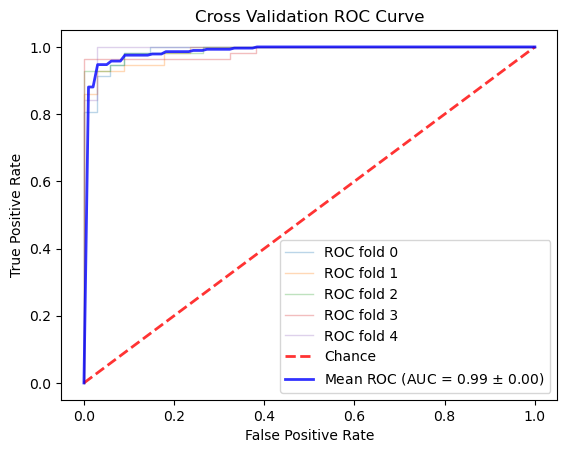

In [8]:
# ROC curve for each fold in cross validation
cv = StratifiedKFold(n_splits=5)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    gnb_best.fit(X_train[train], y_train[train])
    y_score = gnb_best.predict_proba(X_train[val])[:, 1]
    fpr, tpr, _ = roc_curve(y_train[val], y_score)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax, alpha=0.3, lw=1, name='ROC fold {}'.format(i))
    interp_tpr = np.interp(mean_fpr, roc_display.fpr, roc_display.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc(fpr, tpr))
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

plt.title("Cross Validation ROC Curve")
plt.legend(loc='best')
plt.show()

In [9]:
# Predicting the target for test dataset
y_pred_test = gnb_best.predict(X_test)
print(y_pred_test)

[0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1]


In [11]:
# compute accuracy of test data
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Test accuracy" + str(accuracy_test))

Test accuracy0.9210526315789473


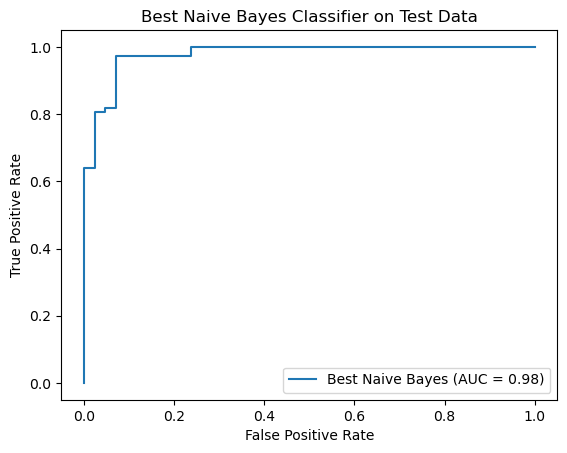

In [12]:
# ROC curve for test data
y_test_score = gnb_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_test_score)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Best Naive Bayes')
display.plot()
plt.title("Best Naive Bayes Classifier on Test Data")
plt.show()
